# When and why to use Tex Typesetting

Tex, or colloquially called LaTeX (or even $\LaTeX$), is a typesetting system that includes a series of metacharacters to provide both markup and programming. It is pervasive in scientific and technical report publishing because it allows for some consistency in templates. For example, there is an OII thesis template that can be used to conform to many of the conventions of a thesis as set out in the handbook. 

A large number of conferences expect their submissions to be typeset in LaTeX and provide templates. It is easily recognised for the smooth typeface details, like attractive kerning and ligatures. As a computer language I do not hear a lot about its use, but I suspect it might be productionized in a variety of ways. 

Some advantages of LaTeX documents:
- Simple plain text file can be consistently converted into larger size when typeset.
- Bibliography referencing through BibTex usually works well to insert lightweight tags. This can be compared to many hyperref tag systems, like field codes in Word documents, which are not lightweight. They are often clumsy and prone to challenges with sharing bibliographies. A single BibTex bibliography file with the references is a very lightweight companion to the .Tex file with the markup. 
- Declaring some basic rules for the size or shape of images and tables can be a lot easier than fussing with tables in a WYSIWYG (what you see is what you get) editor.

Some disadvantages: 
- WYSIWYG is often faster for drafting documents and easier to use with people unfamiliar with LaTeX. Even Overleaf is still often a bridge too far for those without the time or inclination. 
- Installation and configuration can bring many surprises and frustrations. 
- Having to debug a report hours before it is due is no fun for anyone. 

Overall, when out to draft scientific publications with collaborators familiar with LaTeX I tend to enjoy it more than other approaches. It somehow doesn't lend itself to the atrophy of comments that happen in Google or Word. I wrote my dissertation in LaTeX because I appreciated the structure it provided. 

If you really want to make a document pop, however, its typesetting features really are still above the other usual approaches with WYSIWYG editors. 

# Jupyter and LaTeX

Jupyter documents are "notebooks" which really comprise a JSON object. You can see this if you open a Jupyter document in a plain text editor. Try in a Firefox browser!  You can also use the nbformat library to explore a jupyter notebook programmatically, as I have done in the code snippet for the summative. To note, I've rewritten the `notebook_path()` code to be more in my own style, which also helps me understand precisely what was going on. 

Part of the Jupyter package of programs is `nbconvert`. This is a program that can be run from the commandline and convert Jupyter notebooks into other formats based on features like the heading structure of the markdown. This is actually pretty impressive and is just one step of abstraction above LaTeX. When you export a Jupyter file to PDF, you are actually invoking LaTeX (or some variant, typically XeLaTeX) to typeset it. The pipeline will be from notebook to .tex file and from .tex file to .pdf. 

This pipeline isn't perfect in many ways. For example:
1. It requires the installation of Latex, which is extra to Anaconda. You can find a version for your operating system at https://www.latex-project.org/. Usually the small version works if you have a shortage of storage space, but otherwise I would recommend the large (typically multi-gigabyte) install. 
2. Some surprise characters in Jupyter do not convert to Tex well and consequently will not convert to PDF. And because the .tex file exported in nbconvert is so algorithmic it is not really human readable the way that much .tex can be. Some of this is easy to identify but some is not and the compile errors might throw you depending on your pipeline. 

Overall, however, I'm surprised at how much finesse I can put in Jupyter and have it make its way to LaTeX. 

## Adding attributes to a Jupyter document 

If you are exporting a Jupyter notebook to a PDF and you want to edit the attributes of it, these are available in Jupyter notebook on the lefthand side, under the 'gears'. Select "Advanced Tools" and you'll see both 'Cell Metadata' and 'Notebook Metadata'. The notebook metadata is passed over by nbconvert into LaTeX. So if you see this document has in that metadata. I appended an 'authors' and a 'title' key, which `nbconvert` recognises and passes on to the `.tex` conversion. 

You will notice that if you try to edit it yourself then you have to wait for the outline of the box  to turn blue, which means it is valid JSON. Then you have to confirm these edits by pressing the check mark at _the top_ of the cell. Sigh. But then when you export to PDF it will have your name and your title without you having to edit the .TeX yourself. 

~~~ json
"authors": [
    {
        "name": "Bernie Hogan"
    }
],
"title": "TeX Typesetting: Context and Applications in Jupyter"
~~~

# Latex and Pandas 

Pandas DataFrames can be exported to LaTeX with the `pd.to_latex()` command. This will then set the table with some standard templating. It is worth considering for documents that despite this, the Jupyter integration is subbar. So it's not easy to cleanly go through nbconvert. The problem is that the styler works on the HTML object not on the underlying DataFrame object. So, it is much preferable to edit afterwards if you want nicely typeset tables (to the best of my knowledge). Observe: 

In [19]:
import pandas as pd 

df = pd.DataFrame([[1,2],[3,4],[5,6],[7,8]],columns=("left","right"))
df

,left,right
0,1,2
1,3,4
2,5,6
3,7,8


In [13]:
print(df.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  left &  right \\
\midrule
0 &     1 &      2 \\
1 &     3 &      4 \\
2 &     5 &      6 \\
3 &     7 &      8 \\
\bottomrule
\end{tabular}



There are a lot of configuration options in `to_latex()` that can help customise your tables to taste. I also find that the program LaTeXiT is very handy here for 'spotchecking' some details. There you have to add `\usepackage{booktabs}` in a preamble as the export requires some tags from this package like `\toprule` and `\bottomrule`. 

In [14]:
print(df.to_markdown()) # requires conda install tabulate

|    |   left |   right |
|---:|-------:|--------:|
|  0 |      1 |       2 |
|  1 |      3 |       4 |
|  2 |      5 |       6 |
|  3 |      7 |       8 |


For markdown on the other hand, you can simply paste that in a cell, but not really programmatically. 

|    |   left |   right |
|---:|-------:|--------:|
|  0 |      1 |       2 |
|  1 |      3 |       4 |
|  2 |      5 |       6 |
|  3 |      7 |       8 |

\begin{tabular}
confusingly, if you place the begin and end tags of tabular it will make a cell.
\end{tabular} 

# Latex and Matplotlib 

In order to use figures in a LaTeX document, you will need to provide the appropriate image tags. What you export from Matplotlib using `plt.save_fig(<filename>)` you can import into a document. But also, if it is displayed on the screen, all that will be done along the way. This is also a good way to check the syntax in .tex for importing an image. You will notice that it has lots of parameters. These are actually really useful in helping to smartly place the image on the screen in the right size and at roughly the right location. However, they do look formidible and admittedly can be a bit frustrating to get 'just right'. 

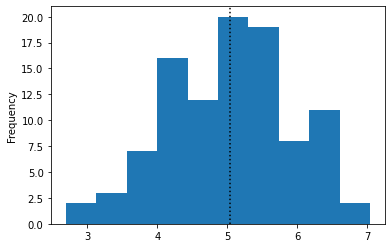

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

arr = np.random.normal(5,1,100)
ax = pd.Series(arr).plot(kind="hist")

ax.axvline(arr.mean(),
           linestyle=":",
           color='black',
           label="The mean")

plt.show()

Unfortunately, this will not look very good on a PDF. You can do the following but it requires installing another program, Inkscape, which is an open source vector graphics editor whose engine is used to convert a vector graphics representation into the format needed for the .pdf

However, then once you have that and you select svg as the default inline output for Jupyter, you'll have very crisp exports. 

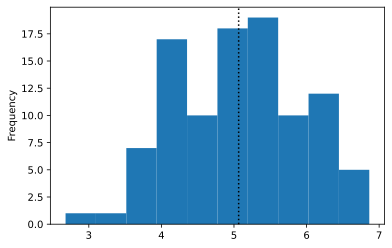

In [2]:
%config InlineBackend.figure_format = 'svg'

plt.show()

arr = np.random.normal(5,1,100)
ax = pd.Series(arr).plot(kind="hist")

ax.axvline(arr.mean(),
           linestyle=":",
           color='black',
           label="The mean")

plt.show()

# Bibtex and Jupyter 

BibTex is the way in which LaTeX papers usually manage their citations. This is done with cite tags in a document (`\cite{}, \citep{}, \citeyear{} etc.`), a template for how to present the cite tags (`*.tplx`), and a file with the citations in the BibTex style (`*.bib`). 

I have not found a satisfactory way in which to automate the workflow for bibliographies from Jupyter to PDF. However, if you use LaTeX with an intermediary .tex file you can edit that file to include the bibliography. 

Citations for the summative can be done in plain text or just pasted from a reference manager. If you choose to do citations in bibtex and that means you won't have a citation list in the jupyter file, but only in the PDF that is definitely fine if you got it working.  